**About Dataset**

**Description:**
Welcome to the Diabetes Prediction Dataset, a valuable resource for researchers, data scientists, and medical professionals interested in the field of diabetes risk assessment and prediction. In this we predict the person have  the diabetes or not through classification machine learning model.

**About the Column**
**Id:** Unique identifier for each data entry.  
**Pregnancies:** Number of times pregnant.  
**Glucose:**Plasma glucose concentration over 2 hours in an oral glucose tolerance test.  
**BloodPressure:** Diastolic blood pressure (mm Hg).  
**SkinThickness**: Triceps skinfold thickness (mm).  
**Insulin:** 2-Hour serum insulin (mu U/ml).  
**BMI:** Body mass index (weight in kg / height in m^2).  
DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.  
**Age:** Age in years.  
**Outcome:** Binary classification indicating the presence (1) or absence (0) of diabetes.  

#Import the library

In [1]:

#Importing libraries

#To Handle data
import numpy as np
import pandas as pd

#To Visulize the data
import matplotlib.pyplot as plt
import seaborn as sns

#To preprocess the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

#ML task
from sklearn.model_selection import train_test_split

#For classification
from sklearn.ensemble import RandomForestClassifier
#Evaluation Metrix 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#Ignore the warning
import warnings
warnings.filterwarnings("ignore")

# Load the data set

In [2]:
df=pd.read_csv("Healthcare-Diabetes.csv")

#Print the first five rows
df.head(5)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


**Data Exploration and Preprocessing:**

In [3]:
#Check the shape of data set 
df.shape
# 2768 -- > Rows
#10 --> columns

(2768, 10)

In [4]:
# Print the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [5]:
#Check the missing values
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# #Scale the  data

#No major effect of scaling because Randomforest model no need of scaling
scale=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in scale:
    df[i]=MinMaxScaler().fit_transform(df[[i]])

**Let's Handling the outliers**

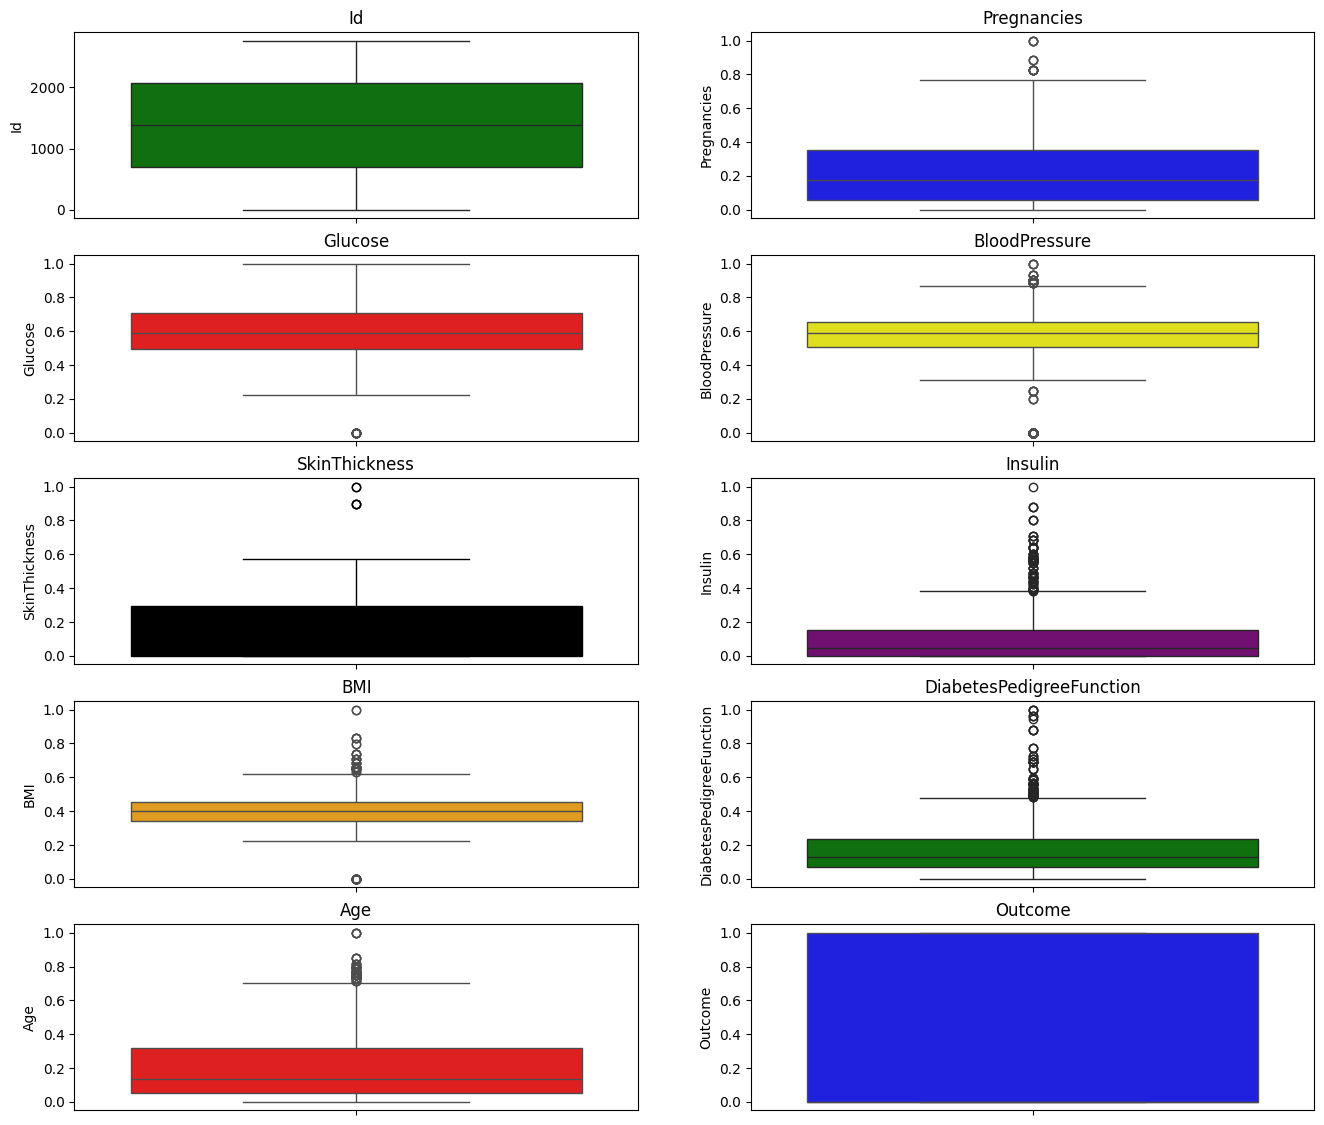

In [7]:
#Check for the outliers in a numerical columns
#Use figure, Draw all in a one shape
plt.figure(figsize=(16,14))
col=['green', 'blue', 'red', 'yellow', 'black', 'purple', 'orange', 'green','red','blue']
for i,j in enumerate(df.select_dtypes(include="number")):
    plt.subplot(5,2,i+1)
    sns.boxplot(df[j],color=col[i])
    plt.title(j)
plt.show()

In [8]:
# # #create a function to remove the outlier by quantile method 
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    innerquartilerange=q3-q1
    loweroutlier=q1-1.5*innerquartilerange
    upperoutlier=q3+1.5*innerquartilerange
    return loweroutlier,upperoutlier

for i in df.select_dtypes(include="number"):
    loweroutlier,upperoutier=wisker(df[i])
    df[i]=np.where(df[i]<loweroutlier,loweroutlier,df[i]) #If less than lower outlier then fill it loweroutlier or as it
    df[i]=np.where(df[i]>upperoutier,upperoutier,df[i])

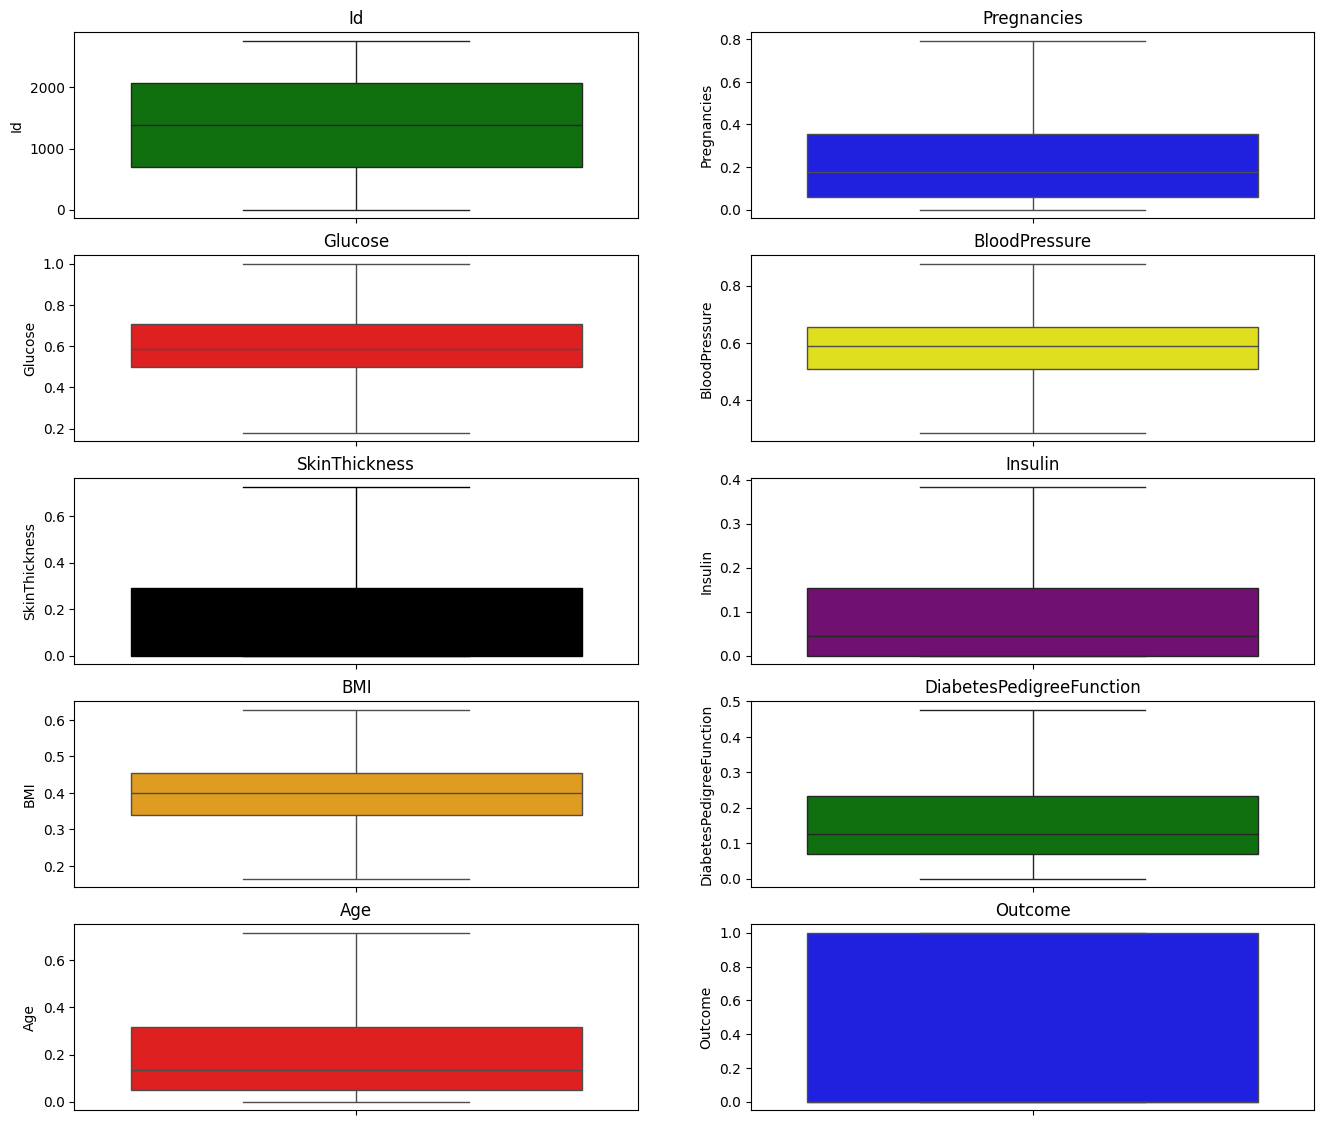

In [9]:
#Check for the outliers are removed in a numerical columns
#Use figure, Draw all in a one shape
plt.figure(figsize=(16,14))
col=['green', 'blue', 'red', 'yellow', 'black', 'purple', 'orange', 'green','red','blue']
for i,j in enumerate(df.select_dtypes(include="number")):
    plt.subplot(5,2,i+1)
    sns.boxplot(df[j],color=col[i])
    plt.title(j)
plt.show()

**LabelEncoding to text to number**

In [10]:
#As All column are numerical so do not need of Label Encoding

**Exploratory data analysis (EDA)**

In [11]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,0.352941,0.743719,0.590164,0.318182,0.000000,0.416873,0.234415,0.483333,1.0
1,2.0,0.058824,0.427136,0.540984,0.263636,0.000000,0.330025,0.116567,0.166667,0.0
2,3.0,0.470588,0.919598,0.524590,0.000000,0.000000,0.289082,0.253629,0.183333,1.0
3,4.0,0.058824,0.447236,0.540984,0.209091,0.111111,0.348635,0.038002,0.000000,0.0
4,5.0,0.000000,0.688442,0.327869,0.318182,0.198582,0.534739,0.476516,0.200000,1.0


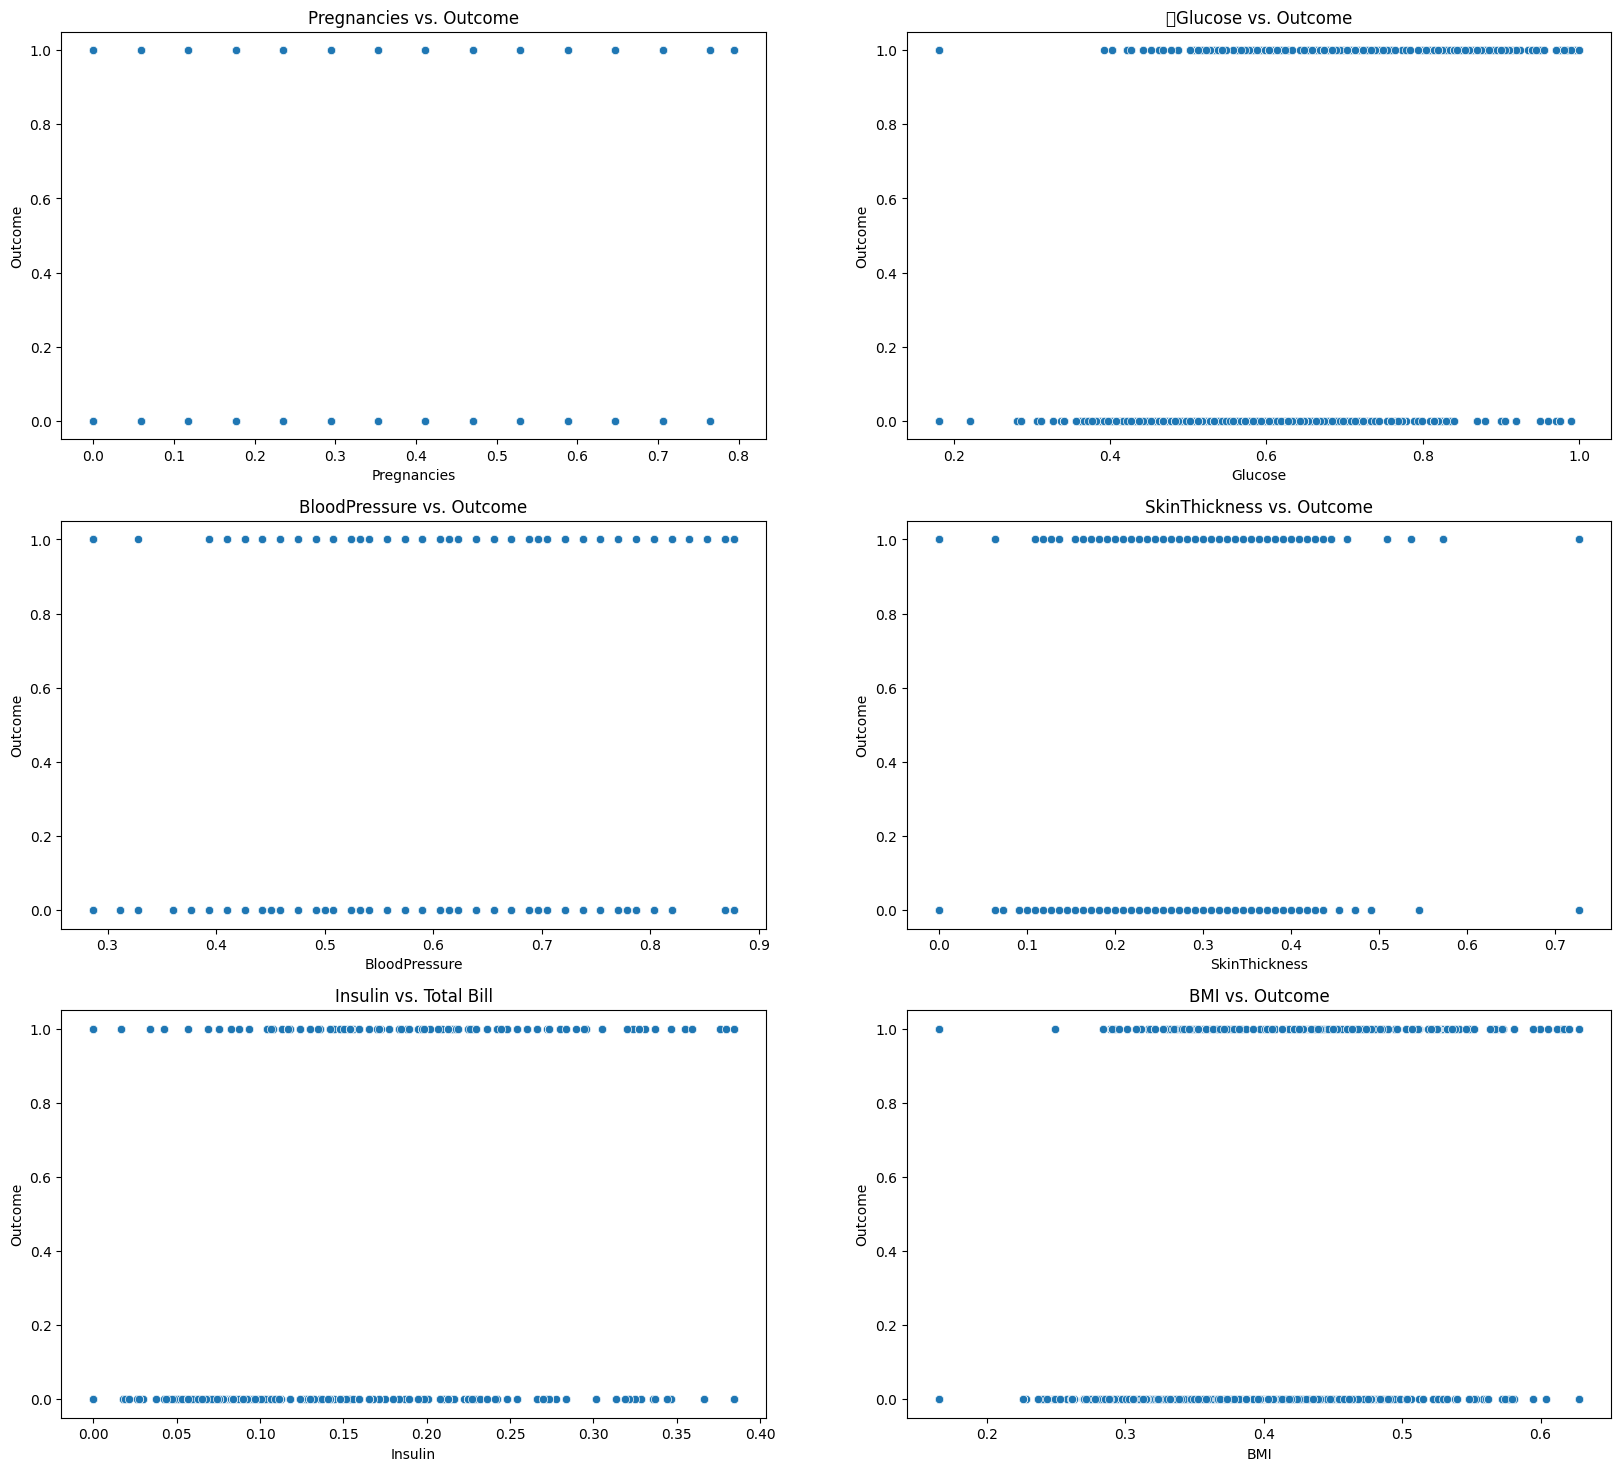

In [12]:
#Scatter plot 

# Set up the figure and axes
plt.figure(figsize=(20, 18))
# Total Bill vs. Tip
plt.subplot(3, 2, 1)
sns.scatterplot(x='Pregnancies', y='Outcome', data=df, palette='Set1')
plt.title('Pregnancies vs. Outcome')

# Total Bill vs Outcome
plt.subplot(3, 2, 2)
sns.scatterplot(x='Glucose', y='Outcome', data=df, palette='Set1')
plt.title('	Glucose vs. Outcome')

# Tip vs. Outcome
plt.subplot(3, 2, 3)
sns.scatterplot(x='BloodPressure', y='Outcome', data=df, palette='Set1')
plt.title('BloodPressure vs. Outcome')

# Total Bill vs. Day
plt.subplot(3, 2, 4)
sns.scatterplot(x='SkinThickness', y='Outcome', data=df, palette='Set1')
plt.title('SkinThickness vs. Outcome')

# Tip vs. Day
plt.subplot(3, 2, 5)
sns.scatterplot(x='Insulin', y='Outcome', data=df, palette='Set1')
plt.title('Insulin vs. Total Bill')

# Total Bill vs. Smoker
plt.subplot(3, 2, 6)
sns.scatterplot(x='BMI', y='Outcome', data=df, palette='Set1')
plt.title('BMI vs. Outcome')

plt.show()


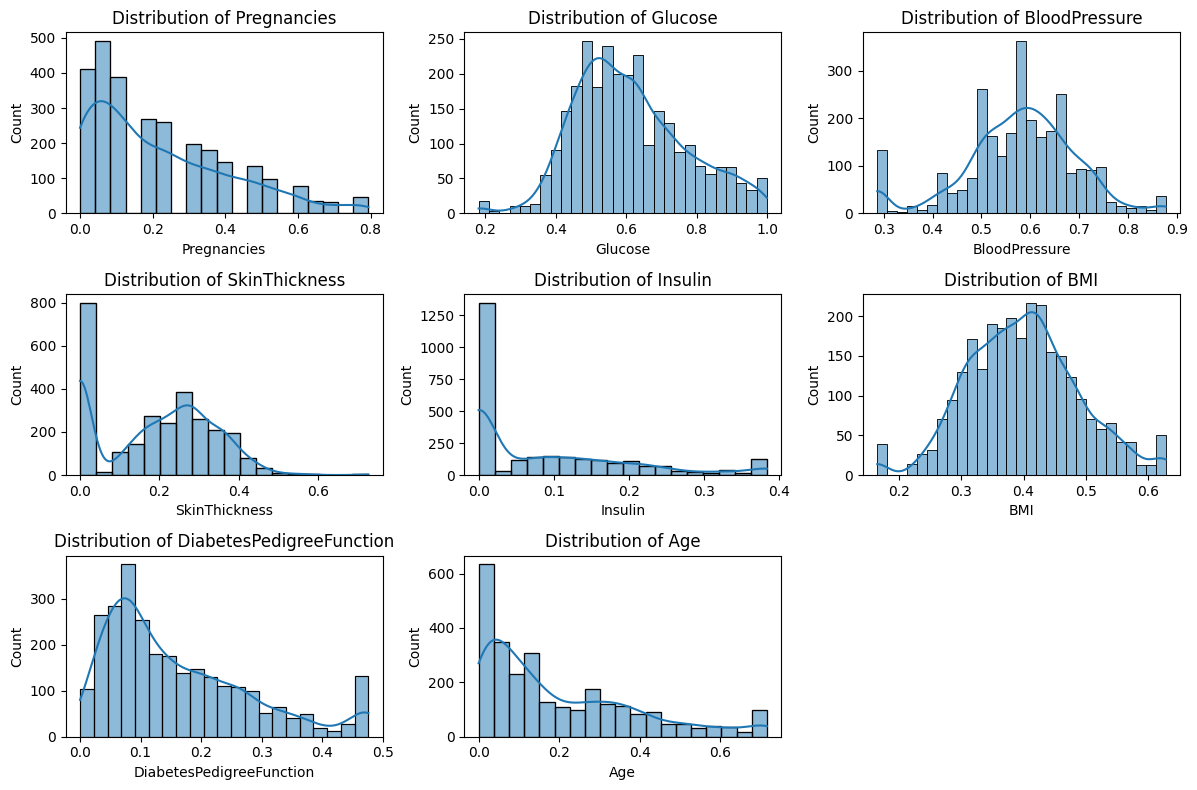

In [13]:
#Feature Distributions of every columns by histogram

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot distributions
for i, title in enumerate(df.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[title], kde=True)
    plt.title(f'Distribution of {title}')

plt.tight_layout()
plt.show()


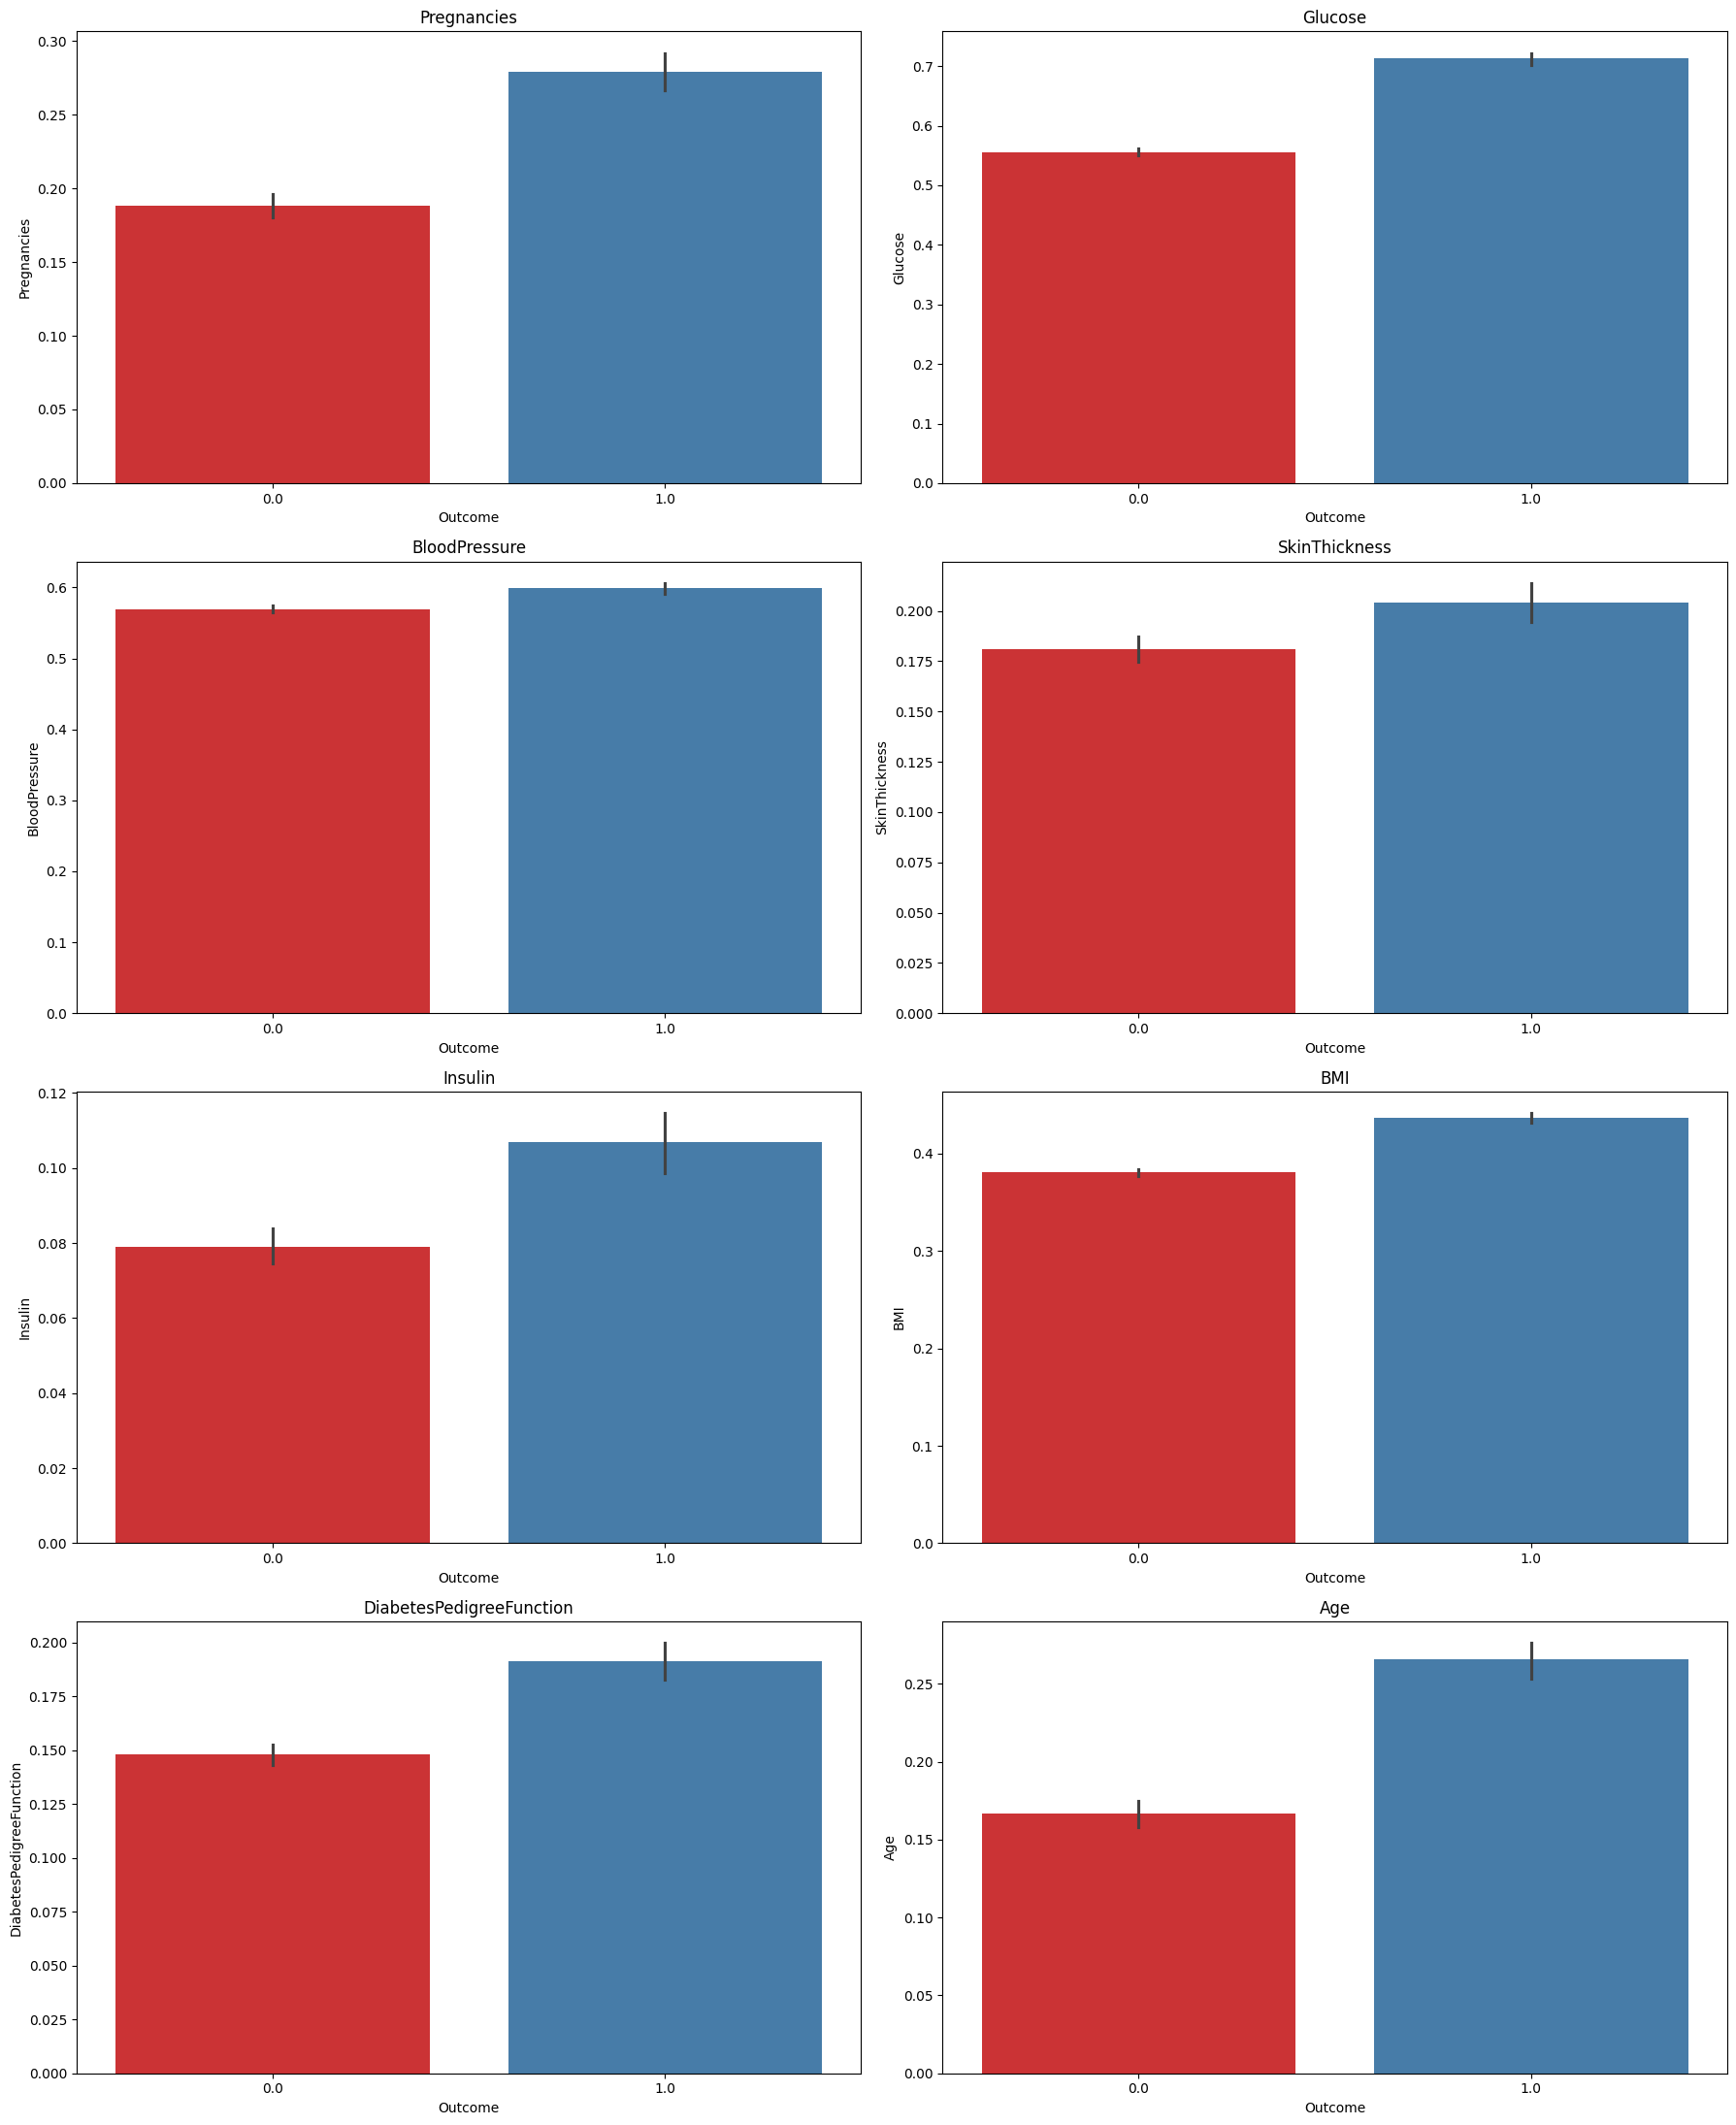

In [16]:
# Plot comparison of features based on Outcome by barplot
coloumn=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(18,22))
col=['green', 'blue', 'red', 'yellow', 'black', 'purple', 'orange', 'green']
for i,j in enumerate(coloumn):
    plt.subplot(4,2,i+1)
    sns.barplot(x="Outcome",y=df[j],color=col[i],data=df,palette="Set1")
    plt.title(j)
plt.tight_layout()
plt.show()

**Applying the Machine Model**

In [17]:

    
X=df.drop("Outcome",axis=1)
Y=df["Outcome"]

# df[X]=StandardScaler().fit_transform(df[[X]])
#Train test and split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Build the model
model=RandomForestClassifier(random_state=42,n_estimators=100)

#Train the model
model.fit(X_train,Y_train)

#Predict the model

Y_pred=model.predict(X_test)

#Evaluate the model or check the accuracy of model

print(f"accuracy_score = {accuracy_score(Y_test,Y_pred)}")
print(f" Classification report \n= {classification_report(Y_test,Y_pred)}")

accuracy_score = 0.9819494584837545
 Classification report 
=               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       367
         1.0       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



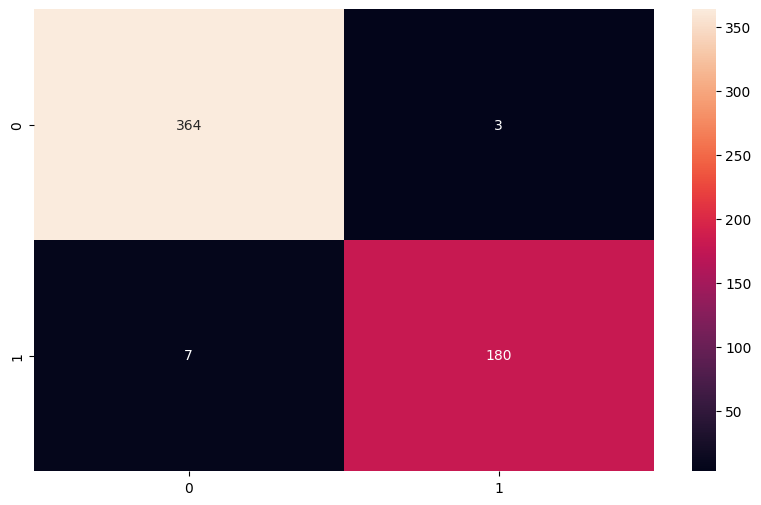

In [18]:
#plot the heat map
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")
plt.show()

In [20]:
#Predict the model
model.predict([[1.0,0.352941,0.743719,0.590164,0.318182,0.000000,0.416873,0.234415,0.483333]])
#Outcome is the 1

array([1.])

In [21]:
model.predict([[2.0,0.058824,0.427136,0.540984,0.263636,0.000000,0.330025,0.116567,0.166667]])
#Outcome is the  0 

array([0.])